<a href="https://colab.research.google.com/github/Suji04/RIT-DSCI-633-FDS/blob/main/Assignments/DSCI_633_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import NN libraries

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.models import load_model

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score

## Load the data and Train-test split

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The data is already divided into train-test set

## Data exploration

#### Finding the shape of the images

In [3]:
print(f"shape of images: {X_train[0].shape}")

shape of images: (28, 28)


#### Visualizing the distribution of classes

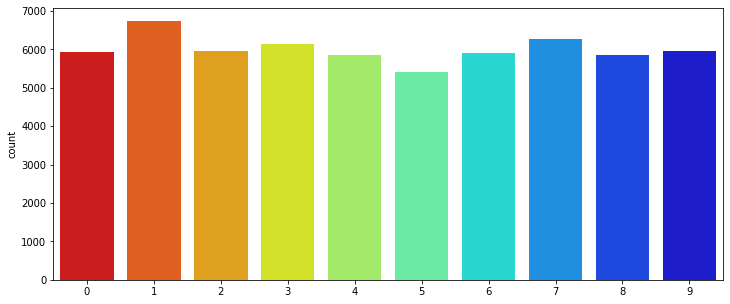

In [4]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.countplot(x=y_train, palette="jet_r")

The data is approximately uniformly distributed among all the classes

#### Visualizing the images

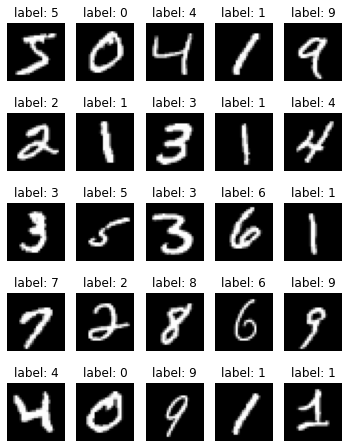

In [5]:
plt.figure(figsize=(6,8))
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(f"label: {y_train[i]}")
    plt.axis("off")

## Data pre-processing

#### Normalizing the pixel values in the range [0, 1]

In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#### Converting targets from numerical data to categorical data

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Building the Neural Network

In [8]:
def make_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

model = make_model()

## Implementing exponentially decaying learning rate in stochastic gradient descent



In [9]:
def exponential_decay(epoch):
   init_lr = 0.1
   k = 0.1
   lr = init_lr * np.exp(-k * epoch)
   return lr 

lr_scheduler = LearningRateScheduler(exponential_decay)

In [10]:
model.compile(loss = 'CategoricalCrossentropy', optimizer = SGD(momentum=0.9), metrics = ['accuracy'])

## Implementing early stopping based on validation accuracy

In [11]:
earlystop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)

## Creating model checkpoints

In [12]:
checkpoint = ModelCheckpoint('model_{epoch:03d}_{val_accuracy:03f}.h5', monitor='val_accuracy', save_best_only=True, verbose=2)

## Training

In [13]:
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks=[lr_scheduler, earlystop, checkpoint])

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2349 - accuracy: 0.9293 - val_loss: 0.1479 - val_accuracy: 0.9547

Epoch 00001: val_accuracy improved from -inf to 0.95470, saving model to model_001_0.954700.h5
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1124 - accuracy: 0.9667 - val_loss: 0.1259 - val_accuracy: 0.9612

Epoch 00002: val_accuracy improved from 0.95470 to 0.96120, saving model to model_002_0.961200.h5
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0724 - accuracy: 0.9782 - val_loss: 0.1165 - val_accuracy: 0.9707

Epoch 00003: val_accuracy improved from 0.96120 to 0.97070, saving model to model_003_0.970700.h5
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0942 - val_accuracy: 0.9743

Epoch 00004: val_accuracy improved from 0.97070 to 0.97430, saving model to model_004_0.974300.h5
Epoch 5/50
1875/1875 [=========

## Plotting loss against learning rate

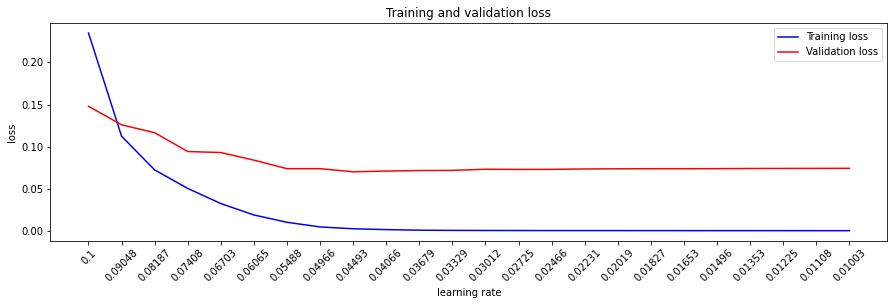

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(0, len(loss))
lr_arr = []
for e in epochs:
  lr_arr.append(np.round(exponential_decay(e), 5))

plt.figure(figsize=(15,4))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xticks(epochs, lr_arr, rotation=45)
plt.ylabel('loss')
plt.xlabel('learning rate')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Value of learning rate when loss shoots up
From the above plot, we notice that as the training progresses both training loss and validation loss generally decrease. However, when lr was 0.06703, the validation loss increased a bit.

## Using various optimizers

#### Adagrad

In [15]:
model_2 = make_model()
model_2.compile(loss = 'CategoricalCrossentropy', optimizer = "Adagrad", metrics = ['accuracy'])
checkpoint = ModelCheckpoint('model_{epoch:03d}_{val_accuracy:03f}.h5', monitor='val_accuracy', save_best_only=True, verbose=2)
history = model_2.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks=[earlystop, checkpoint])

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0479 - accuracy: 0.7719 - val_loss: 0.5904 - val_accuracy: 0.8739

Epoch 00001: val_accuracy improved from -inf to 0.87390, saving model to model_001_0.873900.h5
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5253 - accuracy: 0.8741 - val_loss: 0.4420 - val_accuracy: 0.8925

Epoch 00002: val_accuracy improved from 0.87390 to 0.89250, saving model to model_002_0.892500.h5
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4321 - accuracy: 0.8893 - val_loss: 0.3865 - val_accuracy: 0.9024

Epoch 00003: val_accuracy improved from 0.89250 to 0.90240, saving model to model_003_0.902400.h5
Epoch 4/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3882 - accuracy: 0.8974 - val_loss: 0.3550 - val_accuracy: 0.9081

Epoch 00004: val_accuracy improved from 0.90240 to 0.90810, saving model to model_004_0.908100.h5
Epoch 5/50
1875/1875 [=========

#### Adam

In [16]:
model_3 = make_model()
model_3.compile(loss = 'CategoricalCrossentropy', optimizer = "adam", metrics = ['accuracy'])
checkpoint = ModelCheckpoint('model_{epoch:03d}_{val_accuracy:03f}.h5', monitor='val_accuracy', save_best_only=True, verbose=2)
history = model_3.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks=[earlystop, checkpoint])

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1990 - accuracy: 0.9417 - val_loss: 0.0996 - val_accuracy: 0.9694

Epoch 00001: val_accuracy improved from -inf to 0.96940, saving model to model_001_0.969400.h5
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0807 - accuracy: 0.9753 - val_loss: 0.0907 - val_accuracy: 0.9712

Epoch 00002: val_accuracy improved from 0.96940 to 0.97120, saving model to model_002_0.971200.h5
Epoch 3/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.0676 - val_accuracy: 0.9797

Epoch 00003: val_accuracy improved from 0.97120 to 0.97970, saving model to model_003_0.979700.h5
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0644 - val_accuracy: 0.9800

Epoch 00004: val_accuracy improved from 0.97970 to 0.98000, saving model to model_004_0.980000.h5
Epoch 5/50
1875/1875 [=========

#### Rmsprop

In [17]:
model_4 = make_model()
model_4.compile(loss = 'CategoricalCrossentropy', optimizer = "RMSprop", metrics = ['accuracy'])
checkpoint = ModelCheckpoint('model_{epoch:03d}_{val_accuracy:03f}.h5', monitor='val_accuracy', save_best_only=True, verbose=2)
history = model_4.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks=[earlystop, checkpoint])

Epoch 1/50
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2035 - accuracy: 0.9397 - val_loss: 0.1033 - val_accuracy: 0.9706

Epoch 00001: val_accuracy improved from -inf to 0.97060, saving model to model_001_0.970600.h5
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0905 - accuracy: 0.9742 - val_loss: 0.0961 - val_accuracy: 0.9751

Epoch 00002: val_accuracy improved from 0.97060 to 0.97510, saving model to model_002_0.975100.h5
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0650 - accuracy: 0.9814 - val_loss: 0.0849 - val_accuracy: 0.9777

Epoch 00003: val_accuracy improved from 0.97510 to 0.97770, saving model to model_003_0.977700.h5
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0503 - accuracy: 0.9858 - val_loss: 0.0869 - val_accuracy: 0.9790

Epoch 00004: val_accuracy improved from 0.97770 to 0.97900, saving model to model_004_0.979000.h5
Epoch 5/50
1875/1875 [=======

## Report accuracy

The highest validation accuracy was achieved by SGD optimizer with exponential lr decay. Hene, this is chosen as the final model.

In [18]:
model = load_model("model_014_0.984100.h5")
predictions = model.predict(X_test)
y_pred = [np.argmax(x) for x in predictions]
y_test_ = [np.argmax(x) for x in y_test]
print(f"accuracy of our model: {np.round(accuracy_score(y_pred, y_test_) * 100, 5)}%")

accuracy of our model: 98.41%
